In [1]:
import cv2
import os
import os.path as osp
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd

from datetime import datetime

from skimage.morphology import skeletonize
from skimage.morphology import thin
from skimage import data
from skimage.util import invert
from skimage.color import rgb2gray
from skimage.feature import hog
from skimage.transform import resize
from nebula.common import display_list_color

In [2]:
def get_hog_features(in_img):

    MAX_ROW_SIZE = 100
    
    # first resize the image
    if in_img.shape[0] > MAX_ROW_SIZE:
        resized_img = resize(
            in_img, 
            (
                MAX_ROW_SIZE, 
                int( ((1.0*MAX_ROW_SIZE)/in_img.shape[0]) * in_img.shape[1] )  
            )
        )
    else:
        resized_img = in_img
        
    fd, hog_image = hog(
        resized_img, 
        orientations=9, 
        pixels_per_cell=(2, 2),
        cells_per_block=(2, 2), 
        visualize=True
    )
    
    return hog_image


def flatten_hog_version(frames):
    return [get_hog_features(f).flatten() for f in frames]


def flatten_objSeg_version(frames):
    return [get_hog_features(f).flatten() for f in frames]

In [3]:
def to_df_hog_only(
    df,
    save_path
):
    df = df.copy()
    
    i = 0
    prev_progress = 0
    size = len(df)
    
    res = []
    for index, row in df.iterrows():
        
        hog = get_hog_features(row["image"])
        res.append(hog)

        i += 1
        cur_progress = int((i+1)*100/size)
        if cur_progress >= prev_progress + 2:
            print(f"progress: {cur_progress}%")
            print(f"processing {index} at {datetime.now()}")
            prev_progress = cur_progress
            
    df["image"] = res
    df.to_pickle(save_path)

    return df

In [4]:
from nebula.common import write_pickle, read_pickle, display

In [5]:
image_pickle_path_easy = 'C:/Users/aphri/Documents/t0002/pycharm/data/yg_ar/image_easy2_df.pkl'
image_pickle_path_medium = 'C:/Users/aphri/Documents/t0002/pycharm/data/yg_ar/image_medium_df.pkl'
image_pickle_path_hard = 'C:/Users/aphri/Documents/t0002/pycharm/data/yg_ar/image_hard_df.pkl'

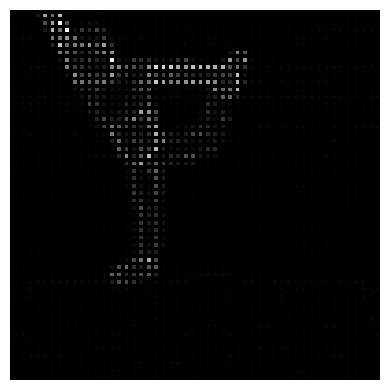

In [6]:
df_easy = read_pickle(image_pickle_path_easy)
img_easy = df_easy["image"].iloc[6000]
hog_easy = get_hog_features(img_easy)
display(hog_easy)

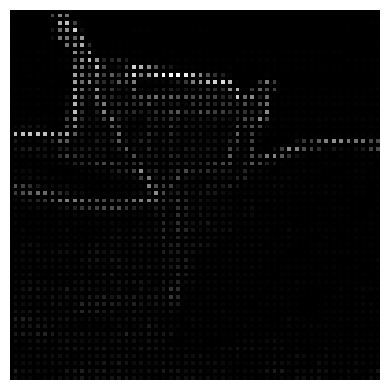

In [7]:
df_medium = read_pickle(image_pickle_path_medium)
img_medium = df_medium["image"].iloc[6000]
hog_medium = get_hog_features(img_medium)
display(hog_medium)

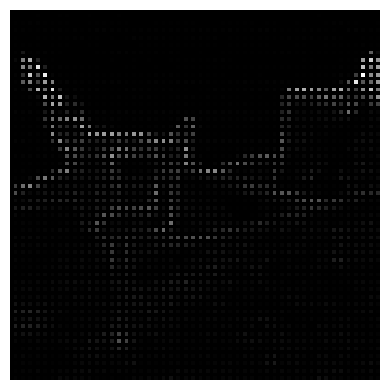

In [8]:
df_hard = read_pickle(image_pickle_path_hard)
img_hard = df_hard["image"].iloc[6015]
hog_hard = get_hog_features(img_hard)
display(hog_hard)

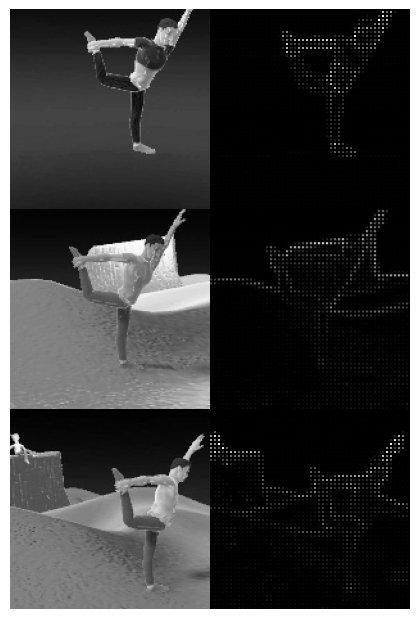

In [9]:
image_list = [
    img_easy, hog_easy,
    img_medium, hog_medium,
    img_hard, hog_hard
]

save_path = "C:/Users/aphri/Documents/t0002/pycharm/data/yg_ar/hog_images.png"
pad_dict = dict(
    left=0,
    bottom=0,
    right=1,
    top=1,
    wspace=0,
    hspace=0
)
display_list_color(image_list, 3, 2, 2, 2, pad_dict=pad_dict, save_path=save_path, is_gray=True)